In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use("ggplot")
pd.set_option("display.max_columns", 100)

In [2]:
# url: https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8
# file is to large to be uploaded to data folder
# url = 'crime.csv' 
# data = pd.read_csv(url)

In [3]:
file_path = 'Crime.csv'
data = pd.read_csv(file_path)

## 1. Is Hollywood the safest area in LA?

C:\Users\fmas8\AppData\Local\Temp\ipykernel_19676\1036372331.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crime Rate per Capita', y='AREA NAME',  data=sorted_data, palette=colors, edgecolor='black', alpha=0.7)
C:\Users\fmas8\AppData\Local\Temp\ipykernel_19676\1036372331.py:23: UserWarning: The palette list has more values (21) than needed (17), which may not be intended.
  sns.barplot(x='Crime Rate per Capita', y='AREA NAME',  data=sorted_data, palette=colors, edgecolor='black', alpha=0.7)


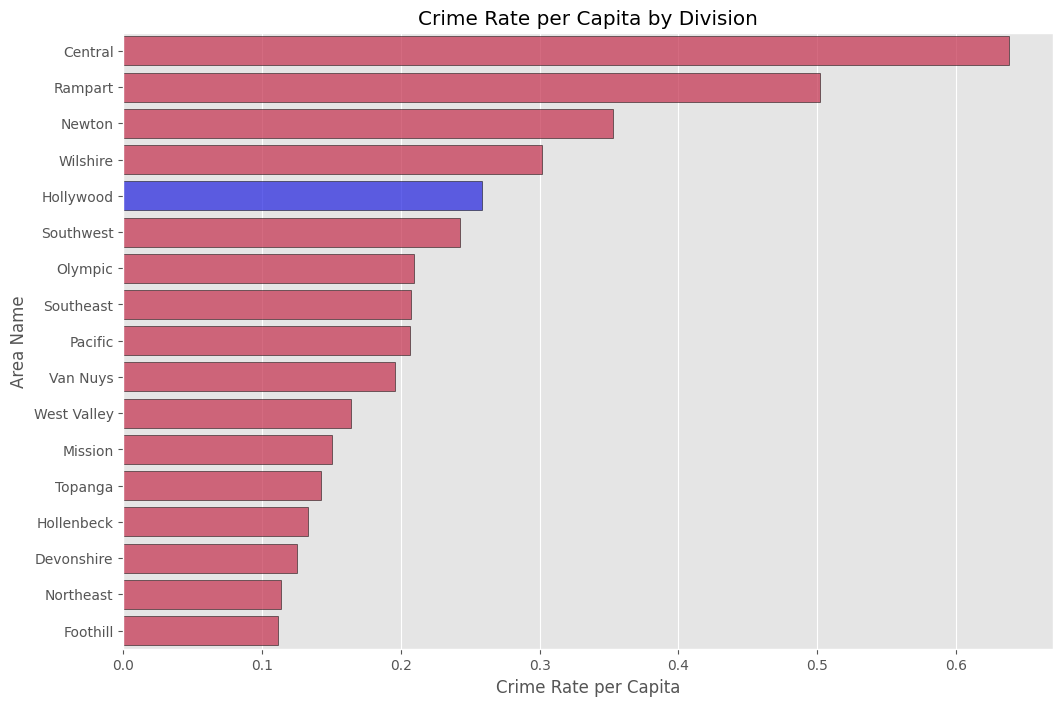

In [4]:
file_path_population = 'combined_stats.csv'
population_df = pd.read_csv(file_path_population)

area_counts = data["AREA NAME"].value_counts()
colors = ['blue' if area == 'Hollywood' else 'crimson' for area, count in area_counts.items()]

# Counting crimes by division
crime_count_by_division = data.groupby('AREA NAME').size().reset_index(name='Crime Count')

# Merge the crime count data with population data
merged_data = pd.merge(crime_count_by_division, population_df, on='AREA NAME')

# Calculate the Crime Rate per Capita
merged_data['Crime Rate per Capita'] = merged_data['Crime Count'] / merged_data['Population']

# Sorting data for better visualization
sorted_data = merged_data.sort_values(by='Crime Rate per Capita', ascending=False)

# Setting colors: blue for Hollywood, crimson for others
sorted_data['color'] = sorted_data['AREA NAME'].apply(lambda x: 'blue' if x.strip().upper() == 'HOLLYWOOD' else 'crimson')

plt.figure(figsize=(12, 8))
sns.barplot(x='Crime Rate per Capita', y='AREA NAME',  data=sorted_data, palette=colors, edgecolor='black', alpha=0.7)
plt.ylabel('Area Name')
plt.xlabel('Crime Rate per Capita')
plt.title('Crime Rate per Capita by Division')
plt.show()


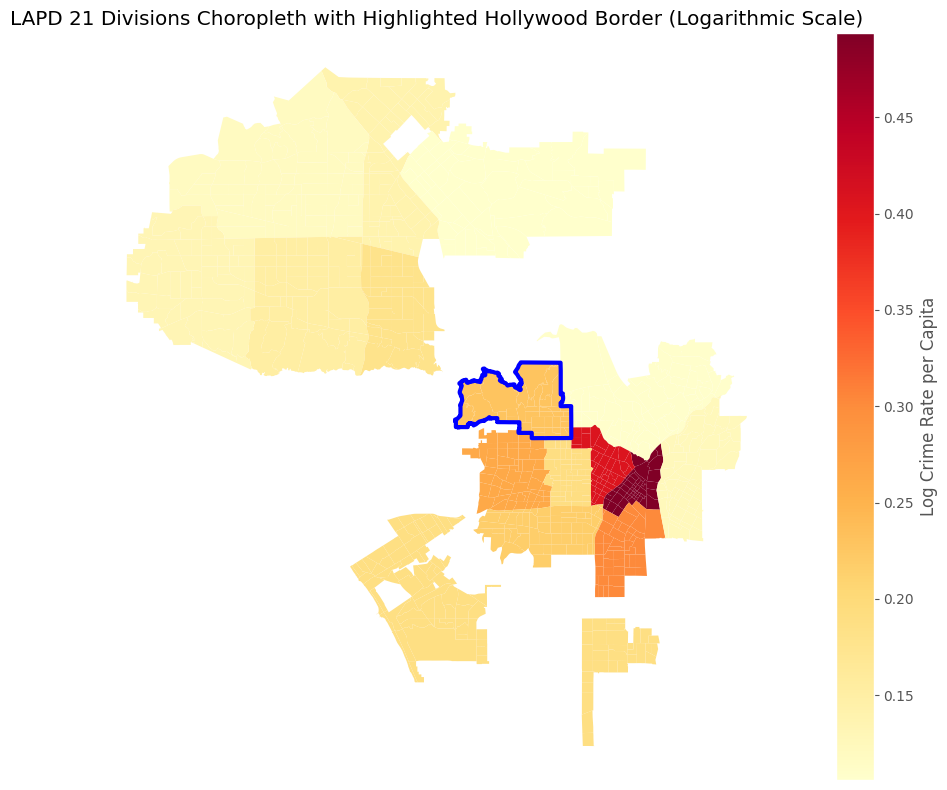

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile
shapefile_path = "LAPD_Reporting_District.shp"
gdf = gpd.read_file(shapefile_path)

# Ensure case matching between gdf and merged_data for AREA NAME
gdf['APREC'] = gdf['APREC'].str.upper()
merged_data['AREA NAME'] = merged_data['AREA NAME'].str.upper()

# Merge geographical data with crime data
merged_gdf = gdf.merge(merged_data, left_on='APREC', right_on='AREA NAME', how='left')

# Calculate logarithm of Crime Rate per Capita
merged_gdf['Log Crime Rate'] = np.log1p(merged_gdf['Crime Rate per Capita'])

# Plotting the choropleth map
fig, ax_choropleth = plt.subplots(1, 1, figsize=(12, 8))
merged_gdf.plot(column='Log Crime Rate', cmap='YlOrRd', linewidth=0.8, ax=ax_choropleth, edgecolor='none', legend=True, legend_kwds={'label': "Log Crime Rate per Capita"})

# Extract Hollywood area and dissolve internal boundaries
hollywood_gdf = merged_gdf[merged_gdf['AREA NAME'] == 'HOLLYWOOD'].dissolve()

# Highlight Hollywood area with outer border only
hollywood_gdf.boundary.plot(ax=ax_choropleth, edgecolor='blue', linewidth=3)

# Customize the map
ax_choropleth.set_title('LAPD 21 Divisions Choropleth with Highlighted Hollywood Border (Logarithmic Scale)')
ax_choropleth.set_axis_off()
plt.tight_layout()
plt.show()


## 2. Are females the most common victims of crime in Los Angeles?

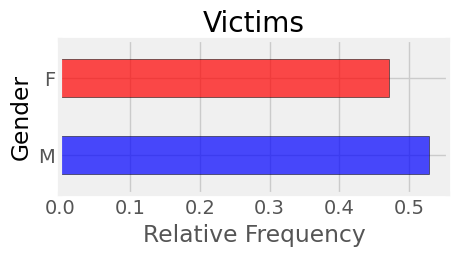

In [6]:
plt.figure(figsize=(5, 2))
# Removing irrelevant gender values for our hypothesis
data = data.query('`Vict Sex` != "X" and `Vict Sex` != "H" and `Vict Sex` != "-"')
plt.style.use('fivethirtyeight')

# Calculate relative frequencies
rel_freq = data['Vict Sex'].value_counts(normalize=True)

# Defining the color scheme
colors = ['blue' if gender == 'M' else 'red' for gender in rel_freq.index]

ax = rel_freq.plot(kind="barh", title= "Victims", edgecolor='black', color = colors, alpha=0.7)
ax.set_ylabel('Gender', color = "black")
ax.set_xlabel('Relative Frequency')
plt.show()


<Figure size 300x800 with 0 Axes>

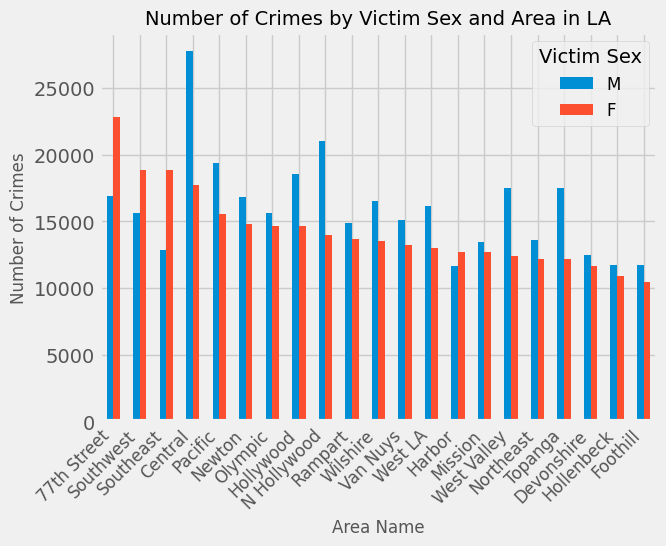

In [7]:

# Counting crimes by victim sex and area
crime_by_sex_and_area = pd.crosstab(data['AREA NAME'], data['Vict Sex'])

# Selecting only male and female victim counts
crime_by_sex_and_area_mf = crime_by_sex_and_area[['M', 'F']]

# Sorting by the number of female victims
crime_by_sex_and_area_mf_sorted = crime_by_sex_and_area_mf.sort_values(by='F', ascending=False)

# Creating a bar plot for visualization 
plt.figure(figsize=(3, 8))
crime_by_sex_and_area_mf_sorted.plot(kind='bar', stacked=False)
plt.title('Number of Crimes by Victim Sex and Area in LA', fontsize=14)
plt.xlabel('Area Name', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Victim Sex', fontsize=12)
plt.show()


C:\Users\fmas8\AppData\Local\Temp\ipykernel_19676\2516103463.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['Date Rptd'] = pd.to_datetime(data_cleaned['Date Rptd'])
C:\Users\fmas8\AppData\Local\Temp\ipykernel_19676\2516103463.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['DATE OCC'] = pd.to_datetime(data_cleaned['DATE OCC'])
C:\Users\fmas8\AppData\Local\Temp\ipykernel_19676\2516103463.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

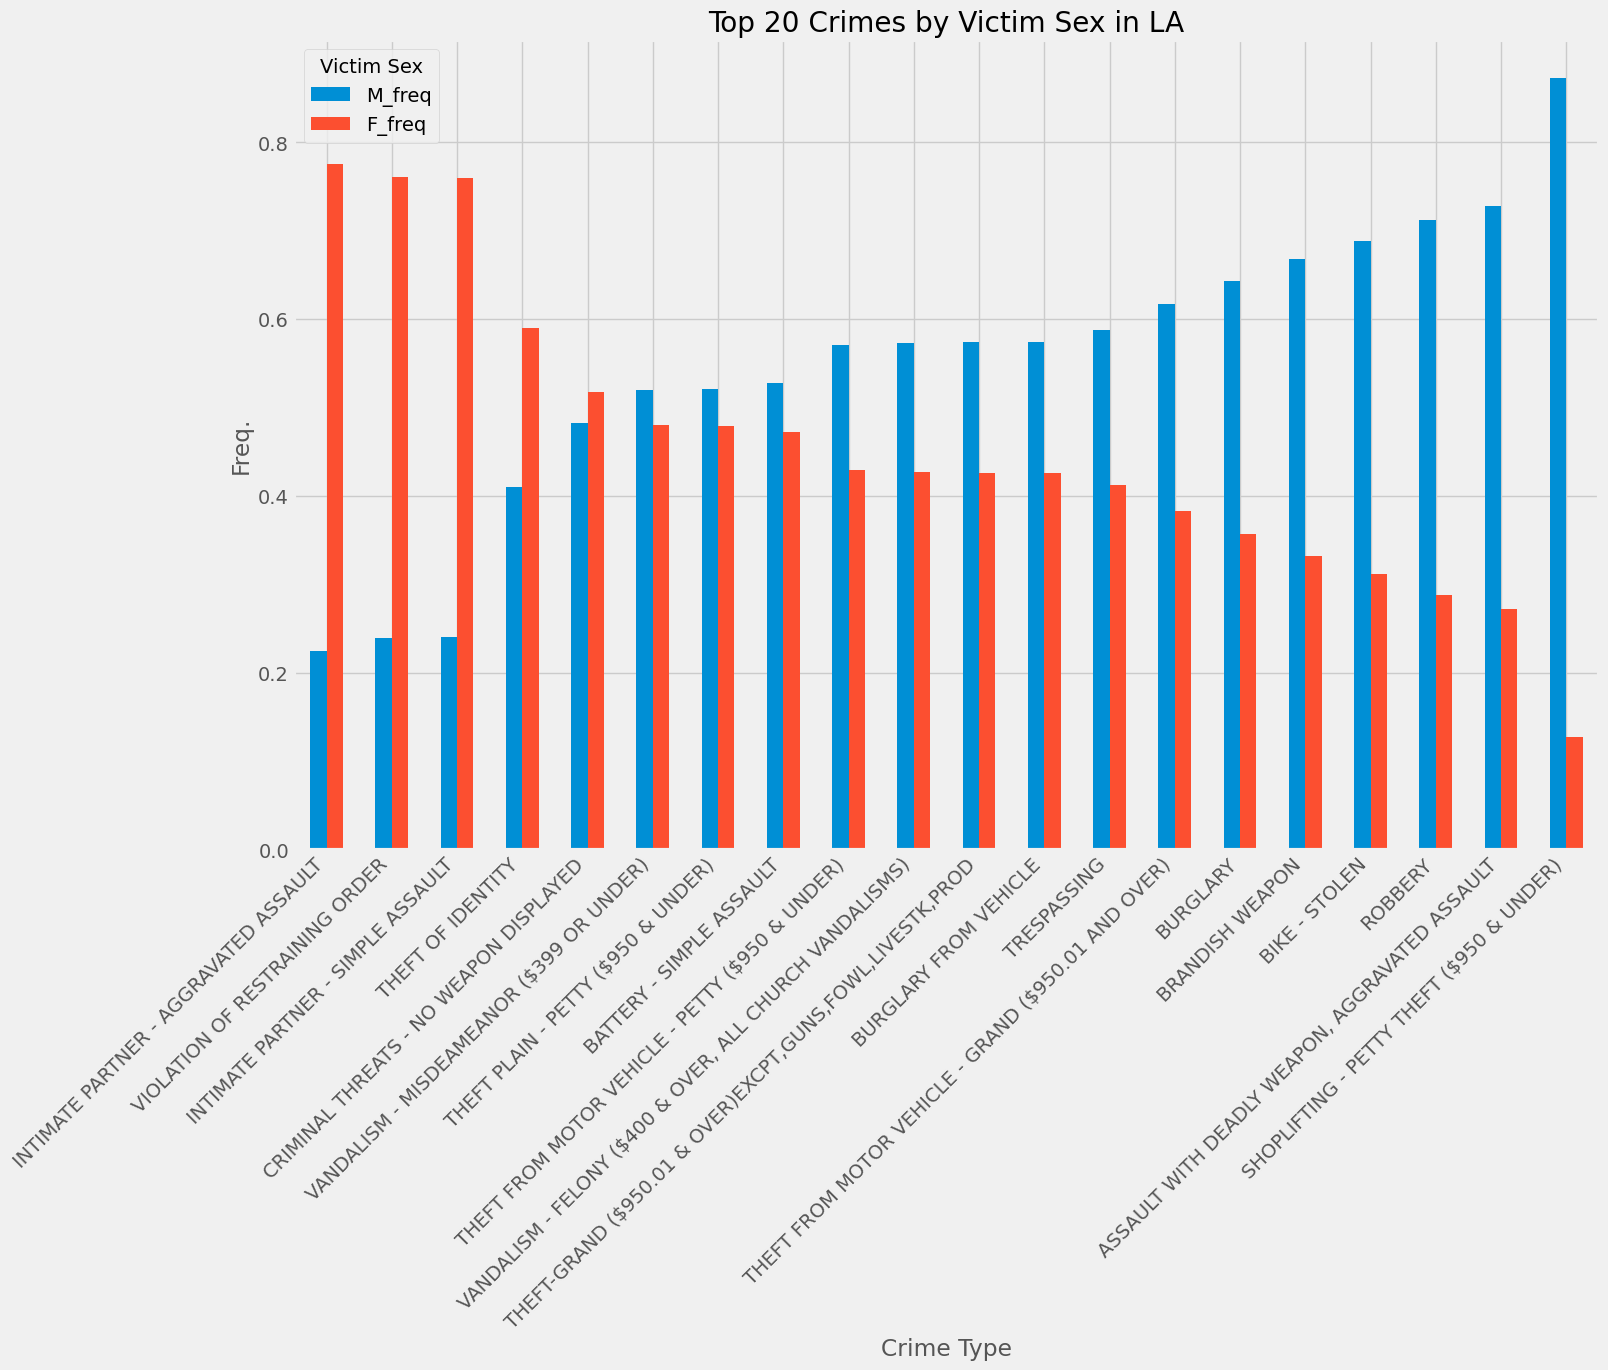

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the dataset
file_path = 'Crime.csv'
data_cleaned = pd.read_csv(file_path)

# Cleaning the dataset
data_cleaned['Date Rptd'] = pd.to_datetime(data_cleaned['Date Rptd'])
data_cleaned['DATE OCC'] = pd.to_datetime(data_cleaned['DATE OCC'])
data_cleaned['Mocodes'].fillna('Unknown', inplace=True)
data_cleaned['Vict Sex'].fillna('U', inplace=True)
data_cleaned['Vict Descent'].fillna('U', inplace=True)
data_cleaned['Premis Desc'].fillna('Unknown', inplace=True)
data_cleaned['Weapon Used Cd'].fillna(0, inplace=True)
data_cleaned['Weapon Desc'].fillna('None', inplace=True)

# Counting crimes by victim sex and type
crime_by_sex_and_type = pd.crosstab(data_cleaned['Crm Cd Desc'], data_cleaned['Vict Sex'])

# Selecting only male and female victim counts
crime_by_sex_and_type_mf = crime_by_sex_and_type[['M', 'F']].copy()

# Define the number of top crime types to display
top_n = 20  

# Summing the male and female counts to get total counts
crime_by_sex_and_type_mf['Total'] = crime_by_sex_and_type_mf['M'] + crime_by_sex_and_type_mf['F']

# Select the top N crime types based on total count
top_crime_types = crime_by_sex_and_type_mf.nlargest(top_n, 'Total')

# Calculate relative frequencies of male and female victims within these top crimes
top_crime_types['M_freq'] = top_crime_types['M'] / top_crime_types['Total']
top_crime_types['F_freq'] = top_crime_types['F'] / top_crime_types['Total']

# Sorting the top crimes by female victim frequency in descending order
top_crime_types_sorted = top_crime_types.sort_values('F_freq', ascending=False)

# Plotting the sorted top crimes by female victim frequency
plt.figure(figsize=(15, 10))
top_crime_types_sorted[['M_freq', 'F_freq']].plot(kind='bar', stacked=False, ax=plt.gca())
plt.title(f'Top {top_n} Crimes by Victim Sex in LA')
plt.xlabel('Crime Type')
plt.ylabel('Freq.')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Victim Sex')
plt.show()


### Description

Understanding patterns and distributions in categorical data is always more informative with a frequency-based perspective. To assess Hollywood's safety compared to other LAPD Divisions we used population count to empower our bar chart with quantitative power of comparison while our choropleth map provided us with geographical context. Almost the same, but different! Both served us well to realize that Beverly Hills doesn’t belong to LAPD jurisdiction.

On contrary, we always knew that men are more common victims of crime. However, we didn't start this analysis to prove our preconceptions, but to find out what lies beneath. Our expected simple bar chart is here just to show frequencies which we already know, so it doesn't count! We have other visualizations to reveal the darker side of the story. Yes, there are Divisions in LA City where women are more vulnerable than men and yes, we have checked, you can trust our word, Top 5 crimes with the highest proportion of female victims are predominantly sexual crimes and human trafficking. However, what we want to reveal is that one specific crime, intimate, is on the rise. Why? We are here to find out!

In [9]:
df = pd.read_csv("Crime.csv")
# Check for missing values
# Drop columns with a high percentage of missing values
df = df.drop(['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'], axis=1)

# Impute missing values in specific columns
df['Mocodes'].fillna('Unknown', inplace=True)
df['Vict Sex'].fillna(df['Vict Sex'].mode()[0], inplace=True)
df['Vict Descent'].fillna(df['Vict Descent'].mode()[0], inplace=True)
df['Premis Cd'].fillna(df['Premis Cd'].mode()[0], inplace=True)
df['Premis Desc'].fillna('Unknown', inplace=True)
df['Crm Cd 1'].fillna(df['Crm Cd 1'].mode()[0], inplace=True)

#after reviewing, the at 0 of victims are unreasonable, decide to drop them 
df = df[df['Vict Age'] != 0]

C:\Users\fmas8\AppData\Local\Temp\ipykernel_19676\4263194013.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mocodes'].fillna('Unknown', inplace=True)
C:\Users\fmas8\AppData\Local\Temp\ipykernel_19676\4263194013.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [10]:
# Now  map the crime instances to the 15 respective  Council Districts by a dataset we created according to the LAPD_Reporting_District and LA_City_Council_Districts_(Adopted_2021)
districts= pd.read_csv("stations_with_districts.csv")#

# convert to upper case 
df['AREA NAME'] = df['AREA NAME'].str.upper()

#convert the names to the same 
name_mapping = {
    'WEST LA': 'WEST LOS ANGELES',
    'N HOLLYWOOD': 'NORTH HOLLYWOOD'}
# Apply the mapping
df['AREA NAME'] = df['AREA NAME'].replace(name_mapping)
print(districts.head())

      DIVISION  District
0       HARBOR        15
1    SOUTHEAST         8
2  77TH STREET         9
3      PACIFIC        11
4    SOUTHWEST         8


In [11]:
# merge two data to add district info for each crime recorded 
merged_data_districts = pd.merge(df, districts, left_on='AREA NAME', right_on='DIVISION', how='left')
# count crimes for each district
crime_counts = merged_data_districts.groupby('District').size().reset_index(name='Crime_Count')

In [12]:
# load population data 
population=pd.read_csv("Population_by_Council_Districts.csv")

# merge crime count to population
p_merged_data = population.merge(crime_counts, left_on='council_district', right_on='District', how='left')

# Calculate the normalized crime rate
p_merged_data['Crime_Rate_Per_100k'] = (p_merged_data['Crime_Count'] / p_merged_data['value']) * 100000



### Q1: Is there a negative correlation between crime types and the income levels within districts?

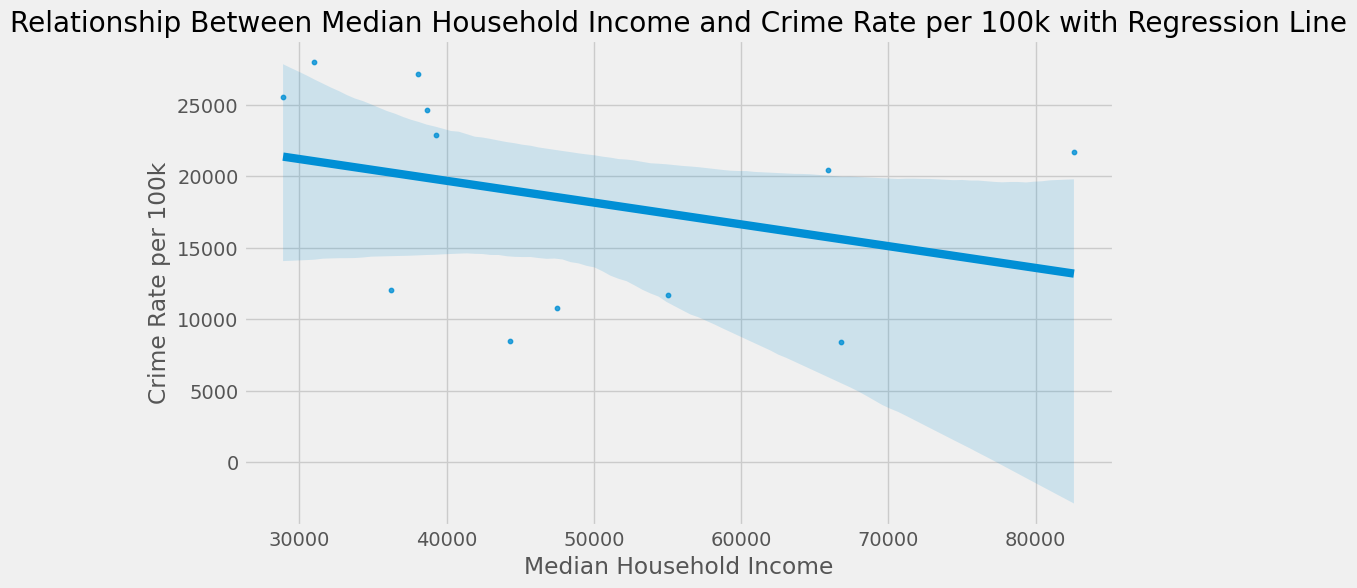

In [13]:
# load income data 
income = pd.read_csv("Median_Household_Income_by_Council_Districts.csv")

# Keep only 'council_district' and 'value', and rename 'value' to 'income'
income = income[['council_district', 'value']].rename(columns={'value': 'Median Household Income'})

# Merge the 'value' column from 'income' into 'p_merged_data'
#changing data type first
p_merged_data['council_district'] = pd.to_numeric(p_merged_data['council_district'], errors='coerce')
income['council_district'] = pd.to_numeric(income['council_district'], errors='coerce')

merged_data = pd.merge(p_merged_data, income[['council_district', 'Median Household Income']], on='council_district', how='left')

# Drop rows where either 'Median Household Income' or 'Crime_Rate_Per_100k' is NaN
merged_data = merged_data.dropna(subset=['Median Household Income', 'Crime_Rate_Per_100k'])


# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_data, x='Median Household Income', y='Crime_Rate_Per_100k', scatter_kws={'s': 10})

# Adding titles and labels
plt.title('Relationship Between Median Household Income and Crime Rate per 100k with Regression Line')
plt.xlabel('Median Household Income')
plt.ylabel('Crime Rate per 100k')
plt.grid(True)
plt.show()

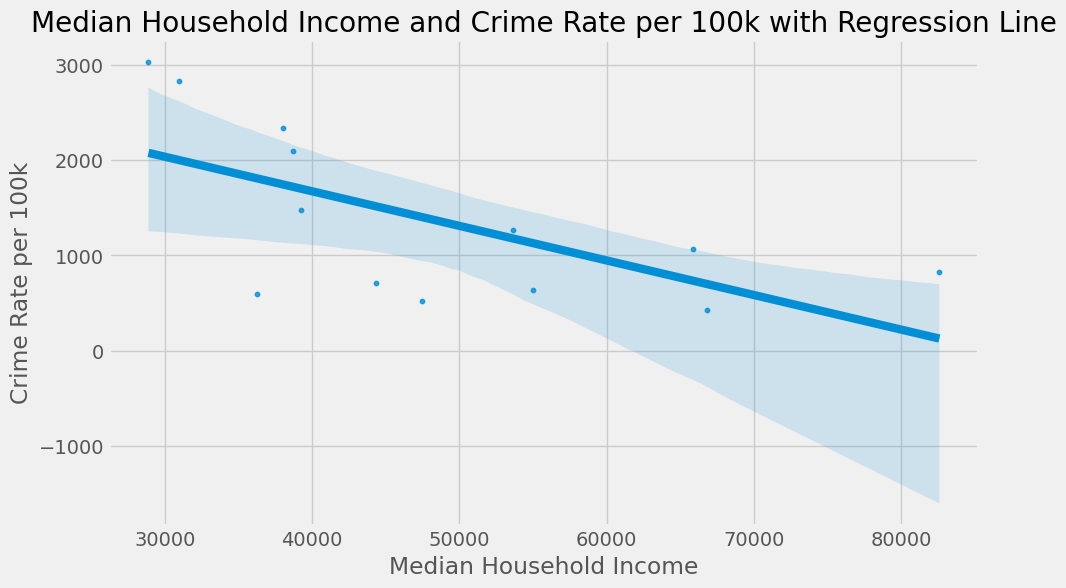

In [14]:
# We try to discover the relation between income and specific crime 
# Filter the data for rows where 'Crm Cd Desc' is 'AGGRAVATED ASSAULT'
agg_assault_data = merged_data_districts[merged_data_districts['Crm Cd Desc'] == 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT']

# Group by 'District', count the occurrences, and reset the index
agg_assault_counts = agg_assault_data.groupby('District').size().reset_index(name='Agg_Assault_Count')

# merge agg_assault_counts to our merged_data
merged_data = merged_data.merge(agg_assault_counts, left_on='council_district', right_on='District', how='left')

# normalised with population 
merged_data['Agg_Assault_Rate_Per_100k'] = (merged_data['Agg_Assault_Count'] / p_merged_data['value']) * 100000
# plotting 
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_data, x='Median Household Income', y='Agg_Assault_Rate_Per_100k', scatter_kws={'s': 10})

# Adding titles and labels
plt.title('Median Household Income and Crime Rate per 100k with Regression Line')
plt.xlabel('Median Household Income')
plt.ylabel('Crime Rate per 100k')
plt.grid(True)
plt.show()

### Q2: Are certain minority groups prone to victims of some crimes?

In [15]:
# first categorize different age groups into 5 groups  
def categorize_age(age):
    if age <= 12:
        return 'children'
    elif age <= 17:
        return 'teens'
    elif age <= 24:
        return 'young adults'
    elif age <= 64:
        return 'adults'
    else:
        return 'seniors'
# map the groupping to data
df['Age Group'] = df['Vict Age'].apply(categorize_age)

# count crimes within each age group
age_group_counts = df['Age Group'].value_counts()

<Figure size 2000x600 with 0 Axes>

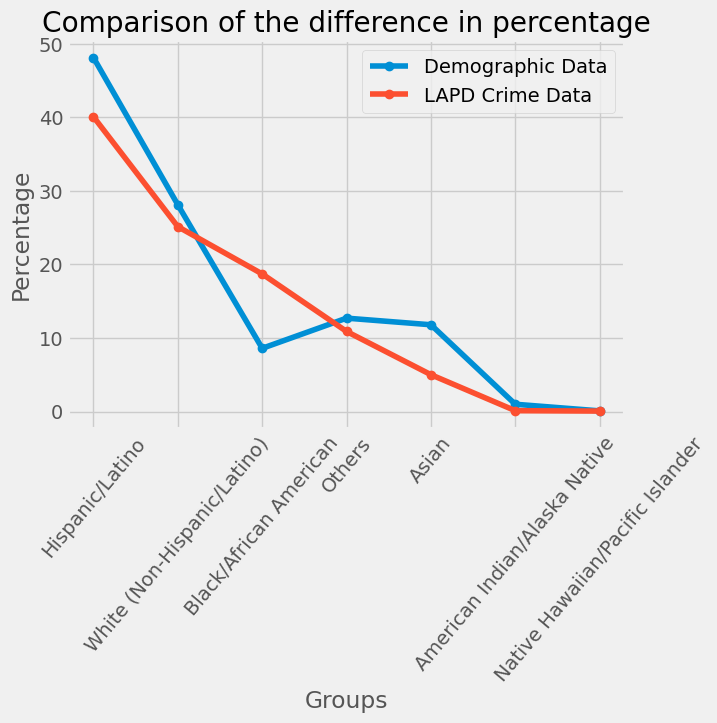

In [16]:
# Mapping dictionary for each ethnic groups
descent_mapping = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'}

# Apply the mapping
df['Vict Descent Descriptive'] = df['Vict Descent'].map(descent_mapping)
# mapping each ethnic groups into a broader definition
descent_mapping = {
    'B': 'Black/African American',
    'I': 'American Indian/Alaska Native',
    'A': 'Asian',
    'C': 'Asian',
    'D': 'Asian',
    'F': 'Asian',
    'J': 'Asian',
    'K': 'Asian',
    'L': 'Asian',
    'V': 'Asian',
    'Z': 'Asian',
    'G': 'Native Hawaiian/Pacific Islander',
    'P': 'Native Hawaiian/Pacific Islander',
    'S': 'Native Hawaiian/Pacific Islander',
    'U': 'Native Hawaiian/Pacific Islander',
    'O': 'Others',
    'X': 'Others',
    'H': 'Hispanic/Latino',
    'W': 'White (Non-Hispanic/Latino)'
}

# Assigning the main group to a new column
df['Vict Descent Descriptive'] = df['Vict Descent'].map(descent_mapping)

vict_descent_des = df['Vict Descent Descriptive'].value_counts() 

group_counts = df['Vict Descent Descriptive'].value_counts(normalize=True) * 100  # Convert to percentages

# adding Demographic data percentages
demographic_data = {
    'Black/African American': 8.6,
    'American Indian/Alaska Native': 1.0,
    'Asian': 11.8,
    'Native Hawaiian/Pacific Islander': 0.1,
    'Others': 12.7,
    'Hispanic/Latino': 48.1,
    'White (Non-Hispanic/Latino)': 28.1
}

# Create a dataframe for plotting
plot_data = pd.DataFrame({
    'Demographic Data': demographic_data,
    'LAPD Crime Data': group_counts
}).sort_index()

# Sorting the DataFrame based on 'LAPD Crime Data' in descending order
sorted_plot_data = plot_data.sort_values(by='LAPD Crime Data', ascending=False)

# Plotting
plt.figure(figsize=(20, 6))
sorted_plot_data.plot(kind='line', marker='o')
plt.title('Comparison of the difference in percentage')
plt.ylabel('Percentage')
plt.xlabel('Groups')
plt.xticks(rotation=50)
plt.grid(True)
plt.show()


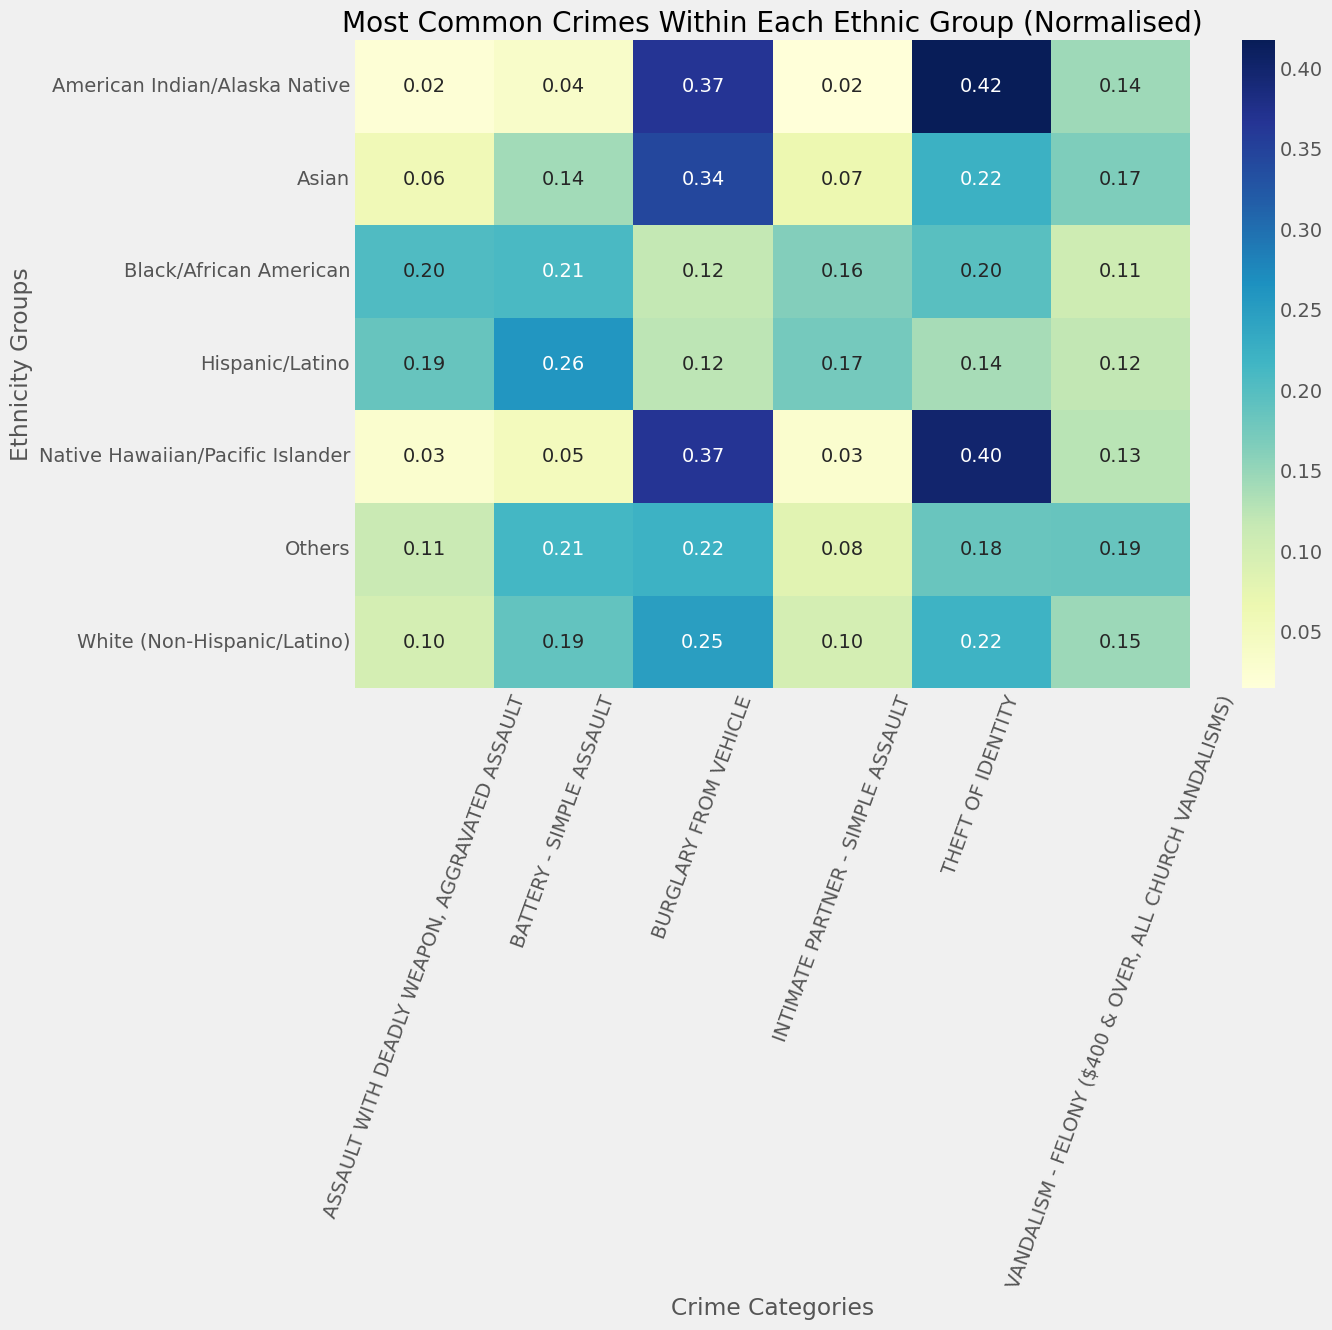

In [17]:
# We try to find the relationshop between the 6 most common crimes and each ethnic group 

# Filtering the DataFrame based on crime categories and ethnic groups
ethnic_groups = [
    'Black/African American',
    'American Indian/Alaska Native',
    'Asian',
    'Native Hawaiian/Pacific Islander',
    'Others',
    'Hispanic/Latino',
    'White (Non-Hispanic/Latino)']

crime_categories = ['BATTERY - SIMPLE ASSAULT', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'INTIMATE PARTNER - SIMPLE ASSAULT','THEFT OF IDENTITY', 'BURGLARY FROM VEHICLE', 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'] 
filtered_df = df[df['Crm Cd Desc'].isin(crime_categories) & df['Vict Descent Descriptive'].isin(ethnic_groups)]

pivot_table_counts = filtered_df.pivot_table(index='Vict Descent Descriptive', columns='Crm Cd Desc', aggfunc='size', fill_value=0)


# now we try to use the population of each group as weight to normalise the crime rate
weight = {
    'Black/African American': 8.6,
    'American Indian/Alaska Native': 1.0,
    'Asian': 11.8,
    'Native Hawaiian/Pacific Islander': 0.1,
    'Others': 12.7,
    'Hispanic/Latino': 48.1,
    'White (Non-Hispanic/Latino)': 28.1
}

filtered_df = df[df['Crm Cd Desc'].isin(crime_categories) & df['Vict Descent Descriptive'].isin(ethnic_groups)].copy()
filtered_df['Weight'] = filtered_df['Vict Descent Descriptive'].map(weight)


# Grouping the data by 'Vict Descent Descriptive' and 'Crm Cd Desc' and summing the weights
grouped_data_with_provided_weight = filtered_df.groupby(['Vict Descent Descriptive', 'Crm Cd Desc'])['Weight'].sum().reset_index()


# Creating a pivot table with the sum of weights
pivot_table_provided_weights = grouped_data_with_provided_weight.pivot_table(index='Vict Descent Descriptive', columns='Crm Cd Desc', values='Weight', aggfunc='sum', 
fill_value=0)


# Normalizing the pivot table by dividing each cell by the sum of weights for each ethnic group
normalized_pivot_table_provided = pivot_table_provided_weights.div(pivot_table_provided_weights.sum(axis=1), axis=0)

# Plotting the normalized heatmap with provided weights
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_pivot_table_provided, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Most Common Crimes Within Each Ethnic Group (Normalised)')
plt.xlabel('Crime Categories')
plt.xticks(rotation=70)
plt.ylabel('Ethnicity Groups')
plt.show()

### Complex Hypotheses - Findings / Insights:

We examine the relationship between income levels and crime rates. Our analysis reveals no significant negative correlation between income levels and overall crime rates across various districts. However, when we narrow down on a specific crime category, 'assault with deadly weapon, aggravated assault', a distinct negative correlation emerges. This finding indicates that districts with higher income levels tend to have lower incidences of aggravated assault. Regarding the impact on various ethnic groups, our data shows that Black/African American individuals disproportionately represent a larger percentage of victims relative to their population proportion. Consequently, we delve deeper to identify the six most common types of crimes and their prevalence among different ethnic groups. Surprisingly, we discover that American Indian/Alaska Native individuals have the highest victimization rate for identity theft, a finding that worth further investigating

## Black Hat Visualization

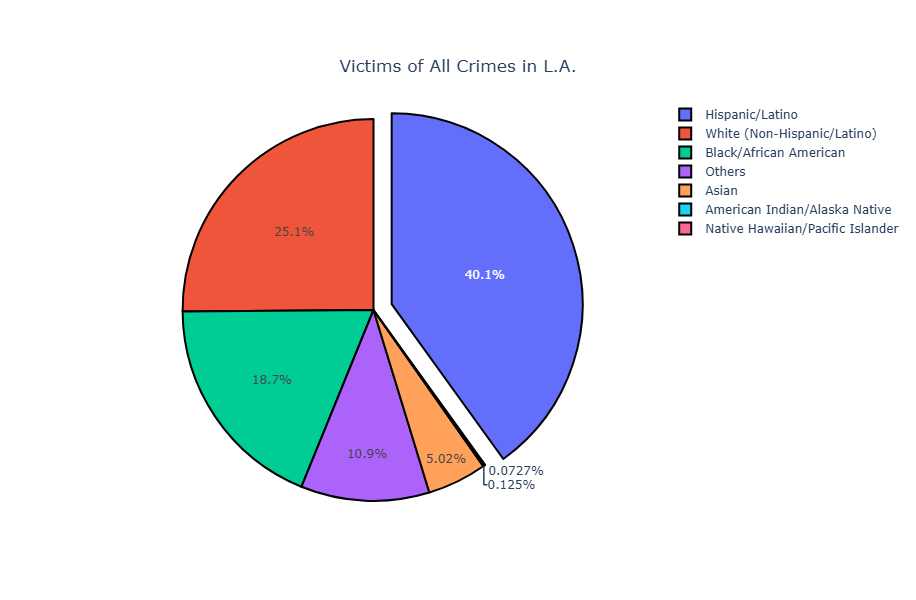

In [18]:
import plotly.graph_objects as go

vict_descent_des = df['Vict Descent Descriptive'].value_counts()

# Identify the index of the largest slice
largest_index = vict_descent_des.idxmax()

# Initialize pull list with all zeros
pull_values = [0] * len(vict_descent_des)

# Pull out the largest slice
pull_values[vict_descent_des.index.get_loc(largest_index)] = 0.1

# Create the data for the plot
data = go.Pie(labels=vict_descent_des.index, values=vict_descent_des, pull=pull_values)

# Create the figure with the data
fig = go.Figure(data=[data])

# Set the title of the plot and adjust its position
fig.update_layout(title={
                        'text': "Victims of All Crimes in L.A.",
                        'y':0.9,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'
                    },
                  # Make the plot bigger
                  autosize=False,
                  width=800,
                  height=600)

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))

fig.show()


#due to the fact its an interactive plot 
from IPython.display import Image

# we insert the screenshot of the plot
Image(url='https://raw.githubusercontent.com/jku-icg-classroom/va-group-project-cyan-crabs/master/screenshot/black%20hat.png?token=GHSAT0AAAAAACM7CCK4HG2M7KRXD2375RDCZNJWJAA')


#### Description

This black hat visualization misleads readers into thinking that Hispanic/Latino people are more prone to being victims of all crime types in Los Angeles City. However, this is a false statement. For those unfamiliar with the demographics of L.A., it might be surprising to learn that the Hispanic/Latino population constitutes 48.1% of the total population. With this in mind, the victimization rate for Hispanic or Latino individuals is actually lower.